# Baselines and Formulation


## Data Preparation

In [1]:
import json
import zipfile
import os
import pandas as pd
import numpy as np

In [2]:
# Install and start postgresql-11 server
!sudo apt-get -y -qq update
!wget --quiet -O - https://www.postgresql.org/media/keys/ACCC4CF8.asc | sudo apt-key add -
!echo "deb http://apt.postgresql.org/pub/repos/apt/ `lsb_release -cs`-pgdg main" |sudo tee  /etc/apt/sources.list.d/pgdg.list
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql-11 postgresql-client-11
!sudo service postgresql start

# Setup a password `postgres` for username `postgres`
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'postgres';"

# Setup a database with name `donors_choose` to be used
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS donors_choose;'

!sudo -u postgres psql -U postgres -c 'CREATE DATABASE donors_choose;'

# Environment variables for connecting to the database
%env DEMO_DATABASE_NAME=donors_choose
%env DEMO_DATABASE_HOST=localhost
%env DEMO_DATABASE_PORT=5432

# Setup a database with name `donors_choose` to be used
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS donors_choose;'

!sudo -u postgres psql -U postgres -c 'CREATE DATABASE donors_choose;'

# Environment variables for connecting to the database
%env DEMO_DATABASE_NAME=donors_choose
%env DEMO_DATABASE_HOST=localhost
%env DEMO_DATABASE_PORT=5432
%env DEMO_DATABASE_USER=postgres
%env DEMO_DATABASE_PASS=postgres

OK
deb http://apt.postgresql.org/pub/repos/apt/ focal-pgdg main
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 13.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package cron.
(Reading database ... 128126 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-136ubuntu1_amd64.deb ...
Unpacking cron (3.0pl1-136ubuntu1) ...
Selecting previously unselected package libjson-perl.
Preparing to unpack .../01-libjson-perl_4.02000-2_all.deb ...
Unpacking libjson-perl (4.02000-2) ...
Selecting previously unselected package netbase.
Preparing to unpack .../02-netbase_6.1_all.deb ...
Unpacking

In [3]:
import json
import zipfile
import os
import pandas as pd

In [4]:
!pip install kaggle

!mkdir /root/.kaggle
!touch /root/.kaggle/kaggle.json
api_token = {"username":"ploped123","key":"eeeeba8fc52706723e4c1bcf41ae6fd3"}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 /root/.kaggle/kaggle.json

!kaggle competitions download -c kdd-cup-2014-predicting-excitement-at-donors-choose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 922M/926M [00:05<00:00, 203MB/s]
100% 926M/926M [00:05<00:00, 179MB/s]


In [5]:
!ls /content

kdd-cup-2014-predicting-excitement-at-donors-choose.zip  sample_data


In [6]:
!unzip /content/kdd-cup-2014-predicting-excitement-at-donors-choose.zip

Archive:  /content/kdd-cup-2014-predicting-excitement-at-donors-choose.zip
  inflating: donations.csv.zip       
  inflating: essays.csv.zip          
  inflating: outcomes.csv.zip        
  inflating: projects.csv.zip        
  inflating: resources.csv.zip       
  inflating: sampleSubmission.csv.zip  


In [7]:
!unzip /content/resources.csv.zip
!unzip /content/donations.csv.zip

Archive:  /content/resources.csv.zip
  inflating: resources.csv           
Archive:  /content/donations.csv.zip
  inflating: donations.csv           


In [8]:
!unzip /content/projects.csv.zip

Archive:  /content/projects.csv.zip
  inflating: projects.csv            


In [9]:
full_donations = pd.read_csv("/content/donations.csv")
full_projects = pd.read_csv("/content/projects.csv")
# full_essays = pd.read_csv("essays.csv")
full_resources = pd.read_csv("/content/resources.csv")

In [11]:
from datetime import timedelta
!pip install textstat
!pip install flair

import textstat

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize

import flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.9/401.9 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 59.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 KB 51.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 56.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... 

## Feature Engineering

In [12]:
a = pd.merge(full_projects, full_donations, on=['projectid'], how='left')
a['in_4_months'] = (pd.to_datetime(a['donation_timestamp']) - pd.to_datetime(a['date_posted'])) < timedelta(days=120)
a['in_1_months'] = (pd.to_datetime(a['donation_timestamp']) - pd.to_datetime(a['date_posted'])) < timedelta(days=30)
a['donation_1mo'] = a['donation_to_project'].values
values = {'donation_to_project': 0.0}
a = a.fillna(value=values)
a.loc[a['in_4_months'] == False, 'donation_to_project'] = 0.0
a.loc[a['in_1_months'] == False, 'donation_1mo'] = 0.0

donation_in_4_months = a.groupby(['projectid'])['donation_to_project'].sum().reset_index(name='donation_in_4_months')
donation_in_1_months = a.groupby(['projectid'])['donation_1mo'].sum().reset_index(name='donation_in_1_months')
df = pd.merge(full_projects, donation_in_4_months, on=['projectid'], how='left')
df = pd.merge(df, donation_in_1_months, on=['projectid'], how='left')

del a

In [13]:
df['is_fully_funded_after_4_months'] = df['total_price_excluding_optional_support'] <= df['donation_in_4_months']
# df['is_fully_funded_after_4_months'] = df['total_asking_price'] <= df['donation_in_4_months']
df['is_fully_funded_after_4_months'].value_counts()
print("Baserate % projects fully funded:", df['is_fully_funded_after_4_months'].mean())

df['pct_funded_1mo'] = df['donation_in_1_months'] / df['total_price_excluding_optional_support']
df['is_fully_funded_after_1_months'] = df['total_price_excluding_optional_support'] <= df['donation_in_1_months']
#df['is_fully_funded_after_1_months'] = df['total_asking_price'] <= df['donation_in_1_months']
df['is_fully_funded_after_1_months'].value_counts()
print("Baserate % projects fully funded 1mo:", df['is_fully_funded_after_1_months'].mean())

Baserate % projects fully funded: 0.5480215269433126
Baserate % projects fully funded 1mo: 0.30470804007842217


In [14]:
df['date_posted'] = pd.to_datetime(df['date_posted'])
df['children_helped_per_dollar'] = df['students_reached']/df['total_price_excluding_optional_support']

In [15]:
from sklearn.preprocessing import OneHotEncoder
one_hot_feature_cols = ['grade_level', 'teacher_prefix', 'school_state']
df = df.replace({'school_charter': {'t': 1, 'f': 0},
                 'school_kipp': {'t': 1, 'f': 0}})

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding
encoder_df = pd.DataFrame(encoder.fit_transform(df[one_hot_feature_cols]).toarray())
encoder_df.columns = encoder.get_feature_names()
#merge one-hot encoded columns back with original DataFrame
final_X = df.join(encoder_df)
#drop the original columns
final_X = final_X.drop(one_hot_feature_cols, axis=1)

#calculate number of projects and the success rate for each city
num_of_success_projects_per_city = dict(df.groupby(['school_city'])['is_fully_funded_after_4_months'].sum())
num_of_projects_per_city = dict(df.groupby(['school_city']).size())

final_X['num_of_success_projects_in_city']= final_X['school_city'].map(num_of_success_projects_per_city)
final_X['num_of_projects_in_city']= final_X['school_city'].map(num_of_projects_per_city)
final_X['success_rate_in_city']= final_X['num_of_success_projects_in_city'] / final_X['num_of_projects_in_city']
#drop 'school city'
final_X = final_X.drop('school_city', axis=1)

#calculate number of projects and the success rate for each teacher
num_of_success_projects_per_teacher = dict(df.groupby(['teacher_acctid'])['is_fully_funded_after_4_months'].sum())
num_of_projects_per_teacher = dict(df.groupby(['teacher_acctid']).size())

final_X['num_of_success_projects_by_teacher']= final_X['teacher_acctid'].map(num_of_success_projects_per_teacher)
final_X['num_of_projects_by_teacher']= final_X['teacher_acctid'].map(num_of_projects_per_teacher)
final_X['success_rate_by_teacher']= final_X['num_of_success_projects_by_teacher'] / final_X['num_of_projects_by_teacher']
#drop 'teacher_acctid'
final_X = final_X.drop('teacher_acctid', axis=1)
df = final_X

# # row 28-36
feature_cols_projects = ['school_charter', 'school_kipp', 'total_price_excluding_optional_support', 'students_reached'] + list(final_X.columns[-63:])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
df.columns

Index(['projectid', 'schoolid', 'school_ncesid', 'school_latitude',
       'school_longitude', 'school_zip', 'school_metro', 'school_district',
       'school_county', 'school_charter',
       ...
       'x2_WA', 'x2_WI', 'x2_WV', 'x2_WY', 'num_of_success_projects_in_city',
       'num_of_projects_in_city', 'success_rate_in_city',
       'num_of_success_projects_by_teacher', 'num_of_projects_by_teacher',
       'success_rate_by_teacher'],
      dtype='object', length=105)

In [17]:
!unzip /content/essays.csv.zip
full_essays = pd.read_csv("/content/essays.csv")
full_essays.head()

Archive:  /content/essays.csv.zip
  inflating: essays.csv              


,projectid,teacher_acctid,title,short_description,need_statement,essay
0,ffffc4f85b60efc5b52347df489d0238,c24011b20fc161ed02248e85beb59a90,iMath,It is imperative that teachers bring technolog...,My students need four iPods.,I am a fourth year fifth grade math teacher. T...
1,ffffac55ee02a49d1abc87ba6fc61135,947066d0af47e0566f334566553dd6a6,Recording Rockin' Readers,Can you imagine having to translate everything...,My students need a camcorder.,Can you imagine having to translate everything...
2,ffff97ed93720407d70a2787475932b0,462270f5d5c212162fcab11afa2623cb,Kindergarten In Need of Important Materials!,It takes a special person to donate to a group...,My students need 17 assorted classroom materia...,Hi. I teach a wonderful group of 4-5 year old ...
3,ffff7266778f71242675416e600b94e1,b9a8f14199e0d8109200ece179281f4f,Let's Find Out!,My Kindergarten students come from a variety o...,"My students need 25 copies of Scholastic's ""Le...",My Kindergarten students come from a variety o...
4,ffff418bb42fad24347527ad96100f81,e885fb002a1d0d39aaed9d21a7683549,Whistle While We Work!,"By using the cross curricular games requested,...",My students need grade level appropriate games...,All work and no play makes school a dull place...


In [18]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [19]:
full_essays.shape

(664098, 6)

In [20]:
sample_essays = full_essays.iloc[:100000]

In [21]:
sample_polarity = sample_essays['title'].astype(str).apply(lambda x: sid.polarity_scores(x))

In [22]:
sample_polarity = sample_essays['short_description'].astype(str).apply(lambda x: sid.polarity_scores(x))

In [23]:
#flair_sentiment= flair.models.TextClassifier.load('en-sentiment')
sid = SentimentIntensityAnalyzer()
for col in ['title','short_description', 'need_statement', 'essay']:
  print(col)
  full_essays[col + '_len'] = full_essays[col].str.len()
  full_essays[col + '_wordlen'] = full_essays[col].astype(str).apply(lambda x: len(x) / len(x.split(' ')))

for col in ['title','short_description']:
  print(col)
  full_essays[col + '_sent'] = full_essays[col].astype(str).apply(lambda x: sid.polarity_scores(x))
  full_essays[col + '_sentnet'] = full_essays[col + '_sent'].apply(lambda x: x['pos'] - x['neg'])
  full_essays[col + '_sentpol'] = full_essays[col + '_sent'].apply(lambda x: x['pos'] + x['neg'])

title
short_description
need_statement
essay
title
short_description


In [24]:
full_essays = full_essays.drop(columns=['teacher_acctid', 'title', 'short_description', 'need_statement', 'essay'])

In [25]:
df = pd.merge(df, full_essays, on=['projectid'], how='left')

In [26]:
df.columns

Index(['projectid', 'schoolid', 'school_ncesid', 'school_latitude',
       'school_longitude', 'school_zip', 'school_metro', 'school_district',
       'school_county', 'school_charter',
       ...
       'need_statement_len', 'need_statement_wordlen', 'essay_len',
       'essay_wordlen', 'title_sent', 'title_sentnet', 'title_sentpol',
       'short_description_sent', 'short_description_sentnet',
       'short_description_sentpol'],
      dtype='object', length=119)

In [27]:
resource_df = full_resources[['resourceid', 'projectid', 'project_resource_type', 'item_unit_price', 'item_quantity']]
resource_df['project_resource_type'] = resource_df['project_resource_type'].astype('str')

# Fill in missing values of item_unit_price & item_quantity
resource_types = np.unique(resource_df['project_resource_type'].tolist())
avg_unit_price = {}
avg_quantity = {}
for rtype in resource_types:
  avg = resource_df.loc[resource_df['project_resource_type'] == rtype]['item_unit_price'].mean()
  avg_unit_price[rtype] = avg
  avg_num = np.floor(resource_df.loc[resource_df['project_resource_type'] == rtype]['item_quantity'].mean())
  avg_quantity[rtype] = avg_num

resource_df['avg_unit_price'] = resource_df.apply(lambda row: avg_unit_price[row['project_resource_type']], axis=1) # This could take a minute to run
resource_df['avg_quantity'] = resource_df.apply(lambda row: avg_quantity[row['project_resource_type']], axis=1)

resource_df['item_unit_price'] = resource_df['item_unit_price'].fillna(resource_df['avg_unit_price'])
resource_df['item_quantity'] = resource_df['item_quantity'].fillna(resource_df['avg_quantity'])

resource_df = resource_df.groupby('projectid').agg({'item_unit_price':'mean', 'item_quantity':'sum'}).reset_index().rename(columns={'item_unit_price':'avg_unit_price', 'item_quantity':'total_item_quantity'})
df = df.merge(resource_df, how='left', on='projectid')

<ipython-input-27-4fa936b62856>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resource_df['project_resource_type'] = resource_df['project_resource_type'].astype('str')
<ipython-input-27-4fa936b62856>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resource_df['avg_unit_price'] = resource_df.apply(lambda row: avg_unit_price[row['project_resource_type']], axis=1) # This could take a minute to run
<ipython-input-27-4fa936b62856>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [28]:
resstat_cols = ['students_reached', 'children_helped_per_dollar', 'primary_focus_area', 'resource_type', 'poverty_level']

text_cols = ['title_len', 'title_sentnet', 'title_sentpol', 'short_description_len', 'short_description_sentnet', 'short_description_sentpol','essay_len', 'need_statement_len']
res_cols = ['avg_unit_price', 'total_item_quantity']
don_cols = ['pct_funded_1mo']
features = resstat_cols + text_cols + res_cols + don_cols + feature_cols_projects
Y = ['is_fully_funded_after_4_months']
df_final = df[['date_posted'] + features + Y]

# Silences a warning that doesn't affect anything
pd.options.mode.chained_assignment = None

for i in ['primary_focus_area', 'resource_type', 'poverty_level']:
  new_addition = pd.get_dummies(df_final[i])
  new_addition.columns = [i + ":" + x.replace(" ","_") for x in new_addition.columns]
  for col_name in new_addition.columns:
    df_final[col_name] = new_addition[col_name].copy(deep=True)
df_final.drop(columns = ['primary_focus_area', 'resource_type', 'poverty_level'], inplace=True)
print(df_final.columns)

Index(['date_posted', 'students_reached', 'children_helped_per_dollar',
       'title_len', 'title_sentnet', 'title_sentpol', 'short_description_len',
       'short_description_sentnet', 'short_description_sentpol', 'essay_len',
       'need_statement_len', 'avg_unit_price', 'total_item_quantity',
       'pct_funded_1mo', 'school_charter', 'school_kipp',
       'total_price_excluding_optional_support', 'students_reached', 'x1_Mr.',
       'x1_Mr. & Mrs.', 'x1_Mrs.', 'x1_Ms.', 'x1_nan', 'x2_AK', 'x2_AL',
       'x2_AR', 'x2_AZ', 'x2_CA', 'x2_CO', 'x2_CT', 'x2_DC', 'x2_DE', 'x2_FL',
       'x2_GA', 'x2_HI', 'x2_IA', 'x2_ID', 'x2_IL', 'x2_IN', 'x2_KS', 'x2_KY',
       'x2_LA', 'x2_La', 'x2_MA', 'x2_MD', 'x2_ME', 'x2_MI', 'x2_MN', 'x2_MO',
       'x2_MS', 'x2_MT', 'x2_NC', 'x2_ND', 'x2_NE', 'x2_NH', 'x2_NJ', 'x2_NM',
       'x2_NV', 'x2_NY', 'x2_OH', 'x2_OK', 'x2_OR', 'x2_PA', 'x2_RI', 'x2_SC',
       'x2_SD', 'x2_TN', 'x2_TX', 'x2_UT', 'x2_VA', 'x2_VT', 'x2_WA', 'x2_WI',
       'x2_WV', '

In [29]:
from datetime import datetime

In [30]:
from dateutil.relativedelta import relativedelta

In [31]:
def chron_split_date_ranges(dates, train_length = relativedelta(years=1), val_length = relativedelta(months=1), retrain_length = relativedelta(weeks=2), min_f_col = relativedelta(months=1), min_l_col = relativedelta(months=4)):
  sorted = dates.sort_values()
  first_date = sorted.iloc[0]
  last_date = sorted.iloc[-1]

  split_dates = []

  curr = first_date

  while curr + val_length + train_length + 2 * min_l_col + 2 * min_f_col < last_date:
    train_start = curr + min_f_col
    val_start = train_start + train_length + min_l_col + min_f_col
    
    split_dates.append({
        "train_feature_collection": (curr, train_start),
        "train": (train_start, train_start + train_length),
        "train_label_buffer": (train_start + train_length, train_start + train_length + min_l_col),
        "val_feature_collection": (train_start + train_length + min_l_col, val_start),
        "val": (val_start , val_start + val_length),
        "val_label_buffer": (val_start + val_length, val_start + val_length + min_l_col),
        "train_label": (train_start + min_l_col, train_start + train_length + min_l_col),
        "val_label": (val_start + min_l_col, val_start + val_length + min_l_col)
    })

    curr += retrain_length
  return split_dates

In [32]:
split = chron_split_date_ranges(pd.to_datetime(df['date_posted']))[-1] # latest split

In [33]:
split

{'train_feature_collection': (Timestamp('2012-06-08 00:00:00'),
  Timestamp('2012-07-08 00:00:00')),
 'train': (Timestamp('2012-07-08 00:00:00'), Timestamp('2013-07-08 00:00:00')),
 'train_label_buffer': (Timestamp('2013-07-08 00:00:00'),
  Timestamp('2013-11-08 00:00:00')),
 'val_feature_collection': (Timestamp('2013-11-08 00:00:00'),
  Timestamp('2013-12-08 00:00:00')),
 'val': (Timestamp('2013-12-08 00:00:00'), Timestamp('2014-01-08 00:00:00')),
 'val_label_buffer': (Timestamp('2014-01-08 00:00:00'),
  Timestamp('2014-05-08 00:00:00')),
 'train_label': (Timestamp('2012-11-08 00:00:00'),
  Timestamp('2013-11-08 00:00:00')),
 'val_label': (Timestamp('2014-04-08 00:00:00'),
  Timestamp('2014-05-08 00:00:00'))}

In [34]:
def generate_train_val(df, split):
  train = df.loc[(split["train"][0] <= df['date_posted']) & (df['date_posted'] < split["train"][1])].drop(columns=['date_posted']).fillna(0)
  val = df.loc[(split["val"][0] <= df['date_posted']) & (df['date_posted'] < split["val"][1])].drop(columns=['date_posted']).fillna(0)
  return pd.DataFrame(train), pd.DataFrame(val)

In [35]:
train, val = generate_train_val(df_final, split)

In [36]:
train_X = train.drop(columns=['is_fully_funded_after_4_months']).reset_index()
train_Y = train['is_fully_funded_after_4_months'].values
val_X = val.drop(columns=['is_fully_funded_after_4_months']).reset_index()
val_Y = val['is_fully_funded_after_4_months'].values

In [37]:
print(val_X.columns)

Index(['index', 'students_reached', 'children_helped_per_dollar', 'title_len',
       'title_sentnet', 'title_sentpol', 'short_description_len',
       'short_description_sentnet', 'short_description_sentpol', 'essay_len',
       'need_statement_len', 'avg_unit_price', 'total_item_quantity',
       'pct_funded_1mo', 'school_charter', 'school_kipp',
       'total_price_excluding_optional_support', 'students_reached', 'x1_Mr.',
       'x1_Mr. & Mrs.', 'x1_Mrs.', 'x1_Ms.', 'x1_nan', 'x2_AK', 'x2_AL',
       'x2_AR', 'x2_AZ', 'x2_CA', 'x2_CO', 'x2_CT', 'x2_DC', 'x2_DE', 'x2_FL',
       'x2_GA', 'x2_HI', 'x2_IA', 'x2_ID', 'x2_IL', 'x2_IN', 'x2_KS', 'x2_KY',
       'x2_LA', 'x2_La', 'x2_MA', 'x2_MD', 'x2_ME', 'x2_MI', 'x2_MN', 'x2_MO',
       'x2_MS', 'x2_MT', 'x2_NC', 'x2_ND', 'x2_NE', 'x2_NH', 'x2_NJ', 'x2_NM',
       'x2_NV', 'x2_NY', 'x2_OH', 'x2_OK', 'x2_OR', 'x2_PA', 'x2_RI', 'x2_SC',
       'x2_SD', 'x2_TN', 'x2_TX', 'x2_UT', 'x2_VA', 'x2_VT', 'x2_WA', 'x2_WI',
       'x2_WV', 'x2_WY'

# ML models

## Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
import time

grid search feature selection

In [113]:
max_res = 0
feature_selected = None
for i in train_X.columns[1:]:
  selected = ["pct_funded_1mo", "children_helped_per_dollar"]
  selected.append(i)
  #print(selected) 
  #print(train_X[selected])
  start = time.time()
  logmodel = LogisticRegression(penalty='none', max_iter=100000000)
  logmodel.fit(train_X[selected], train_Y)
  train_pred = logmodel.predict_proba(train_X[selected])
  val_pred = logmodel.predict_proba(val_X[selected]) # f(x)
  res = logmodel.predict(val_X[selected]) # f(x)>0.5
  train_rank = np.argsort(train_pred[:,1])
  val_rank = np.argsort(val_pred[:,1])
  results = []
  for threshold in np.linspace(0.01, 1, 100):
      precision_train = 1 - np.mean(train_Y[train_rank][:int(threshold * len(train_X))])
      precision_val = 1 - np.mean(val_Y[val_rank][:int(threshold * len(val_X))])
      recall_train = np.sum(train_Y[train_rank][:int(threshold * len(train_X))] == False)/np.sum(train_Y==False)
      recall_val = np.sum(val_Y[val_rank][:int(threshold * len(val_X))] == False)/np.sum(val_Y==False)
      results.append([precision_train, recall_train, precision_val, recall_val])
  results = np.array(results)
  #print(results[9, 2]) 
  if max_res < results[9, 2]:
    max_res = results[9, 2]
    feature_selected = selected
print(max_res, feature_selected)

1.0 ['pct_funded_1mo', 'children_helped_per_dollar', 'poverty_level:moderate_poverty']


most recent PR-K graphs

In [120]:
selected = feature_selected
start = time.time()
logmodel = LogisticRegression(penalty='none', max_iter=100000000)
logmodel.fit(train_X[selected], train_Y)
runtime = time.time() - start
print(runtime)

0.31787848472595215


In [121]:
#print(val_X)

In [122]:
train_pred = logmodel.predict_proba(train_X[selected])
val_pred = logmodel.predict_proba(val_X[selected]) # f(x)
res = logmodel.predict(val_X[selected]) # f(x)>0.5

In [123]:
print(val_pred[:,1])

[0.32004793 0.0397341  0.0641692  ... 0.99534132 0.96508508 0.01896311]


In [124]:
print(res)

[False False False ...  True  True False]


In [125]:
train_rank = np.argsort(train_pred[:,1])
val_rank = np.argsort(val_pred[:,1])

In [128]:
results = []
for threshold in np.linspace(0.01, 1, 100):
    precision_train = 1 - np.mean(train_Y[train_rank][:int(threshold * len(train_X))])
    precision_val = 1 - np.mean(val_Y[val_rank][:int(threshold * len(val_X))])
    recall_train = np.sum(train_Y[train_rank][:int(threshold * len(train_X))] == False)/np.sum(train_Y==False)
    recall_val = np.sum(val_Y[val_rank][:int(threshold * len(val_X))] == False)/np.sum(val_Y==False)
    results.append([precision_train, recall_train, precision_val, recall_val])
results = np.array(results)
print(results[9, 2])  # 0.683 for l2

1.0


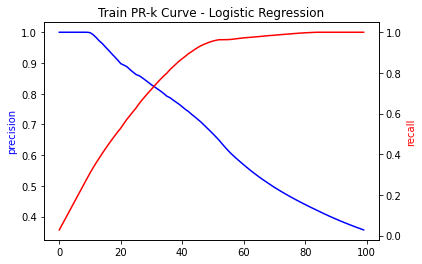

In [129]:
import matplotlib.pyplot as plt

ax1 = plt.subplot()
plt.plot(range(100), results[:,0], 'b')
plt.ylabel('precision', color='b')

ax2 = ax1.twinx()
plt.plot(range(100), results[:,1], 'r')
plt.ylabel('recall', color='r')
plt.title("Train PR-k Curve - Logistic Regression")
plt.xlabel("Percentage of population selected")
plt.show()

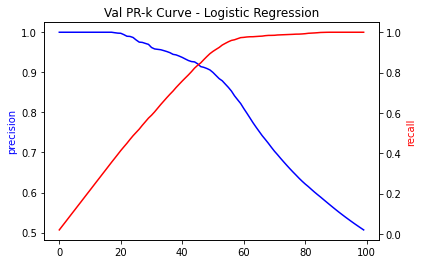

In [130]:
ax1 = plt.subplot()
plt.plot(range(100), results[:,2], 'b')
plt.ylabel('precision', color='b')

ax2 = ax1.twinx()
plt.plot(range(100), results[:,3], 'r')
plt.ylabel('recall', color='r')
plt.title("Val PR-k Curve - Logistic Regression")
plt.show()

In [131]:
# train_X.columns[np.argsort(logmodel.feature_importances_)[::-1]]

whole dataset evaluation (precision, recall, tfp)

In [141]:
whole_split = chron_split_date_ranges(pd.to_datetime(df['date_posted']))

In [178]:
y_value = []
for s in whole_split:
  #print(s)
  curtrain, curval = generate_train_val(df_final, s)
  curtrain_X = curtrain.drop(columns=['is_fully_funded_after_4_months']).reset_index()
  curtrain_Y = curtrain['is_fully_funded_after_4_months'].values
  curval_X = curval.drop(columns=['is_fully_funded_after_4_months']).reset_index()
  curval_Y = curval['is_fully_funded_after_4_months'].values
  #curtrain_X.dropna(inplace=True)
  #indices_to_keep = ~curtrain_X.isin([np.nan, np.inf, -np.inf]).any(axis=1)
  #curtrain_X[indices_to_keep].astype(np.float64)
  #curtrain_X.dropna(inplace=True)
  curtrain_X[np.isinf(curtrain_X)==True] = 0
  curval_X[np.isinf(curval_X)==True] = 0
  logmodel = LogisticRegression(penalty='none', max_iter=100000000)
  logmodel.fit(curtrain_X[selected], curtrain_Y)
  train_pred = logmodel.predict_proba(curtrain_X[selected])
  val_pred = logmodel.predict_proba(curval_X[selected]) # f(x)
  res = logmodel.predict(curval_X[selected]) # f(x)>0.5
  train_rank = np.argsort(train_pred[:,1])
  val_rank = np.argsort(val_pred[:,1])
  results = []
  threshold = 0.1
  #precision_train = 1 - np.mean(curtrain_Y[train_rank][:int(threshold * len(curtrain_X))])
  precision_val = 1 - np.mean(curval_Y[val_rank][:int(threshold * len(curval_X))])
  #recall_train = np.sum(train_Y[train_rank][:int(threshold * len(train_X))] == False)/np.sum(train_Y==False)
  #recall_val = np.sum(val_Y[val_rank][:int(threshold * len(val_X))] == False)/np.sum(val_Y==False)
  # results.append([precision_train, recall_train, precision_val, recall_val])
  # results = np.array(results)
  print(precision_val)  # 0.683 for l2
  y_value.append(precision_val)

0.36111111111111116
0.21875
0.5555555555555556
0.7692307692307692
0.875
0.7586206896551724
0.7777777777777778
0.9166666666666666
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.993421052631579
0.9414225941422594
0.939047619047619
0.9663551401869159
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9624060150375939
0.9478991596638655
0.97666

In [180]:
file1 = open('lr.txt', 'w')
file1.writelines(str(y_value))
file1.close()